In [1]:
# Import the pandas library in order to read in iris data
import pandas as pd

# This code means all plots produced in the notebook will be in line with each other
%matplotlib inline 

from sklearn.datasets import load_iris # Import the iris data set from the scikit learn library

iris, target = load_iris(as_frame = True, return_X_y = True) # Reading the iris dataset calling the X variables "iris" and y variables "target"

iris.head()
# Look at the first 5 rows of the iris DataFrame

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [2]:
target
# Look at the targets in the DataFrame

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int32

In [3]:
# Create a variable called corr containing the corr() function, this will allow us to create a matrix to visualise all of the correlations in the DataFrame
corr = iris.corr()
corr

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


In [4]:
import numpy as np # Import the numpy library

np.fill_diagonal(corr.values, np.nan)
corr
# Remove the diagonal correlations (variables correlated with themselves) and recall the corr matrix

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),NaN,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,NaN,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,NaN,0.962865
petal width (cm),0.817941,-0.366126,0.962865,NaN


<AxesSubplot:>

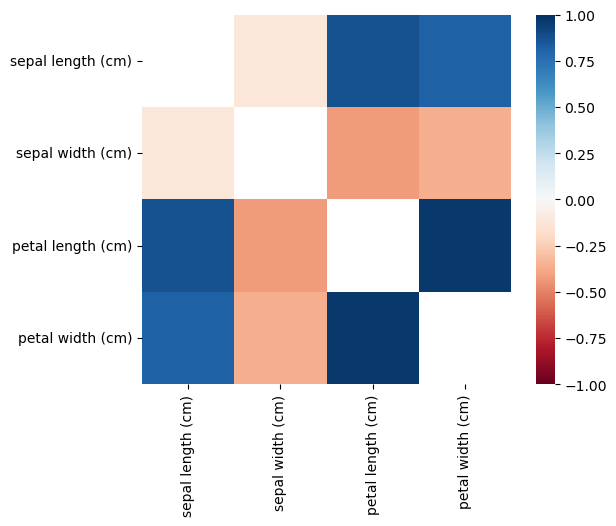

In [5]:
import seaborn as sns # Import the seaborn library

sns.heatmap(corr, vmin = -1.0, vmax = 1.0, square = True, cmap = "RdBu")
# Creating a heatmap of the correlation matrix to better visualise the correlations

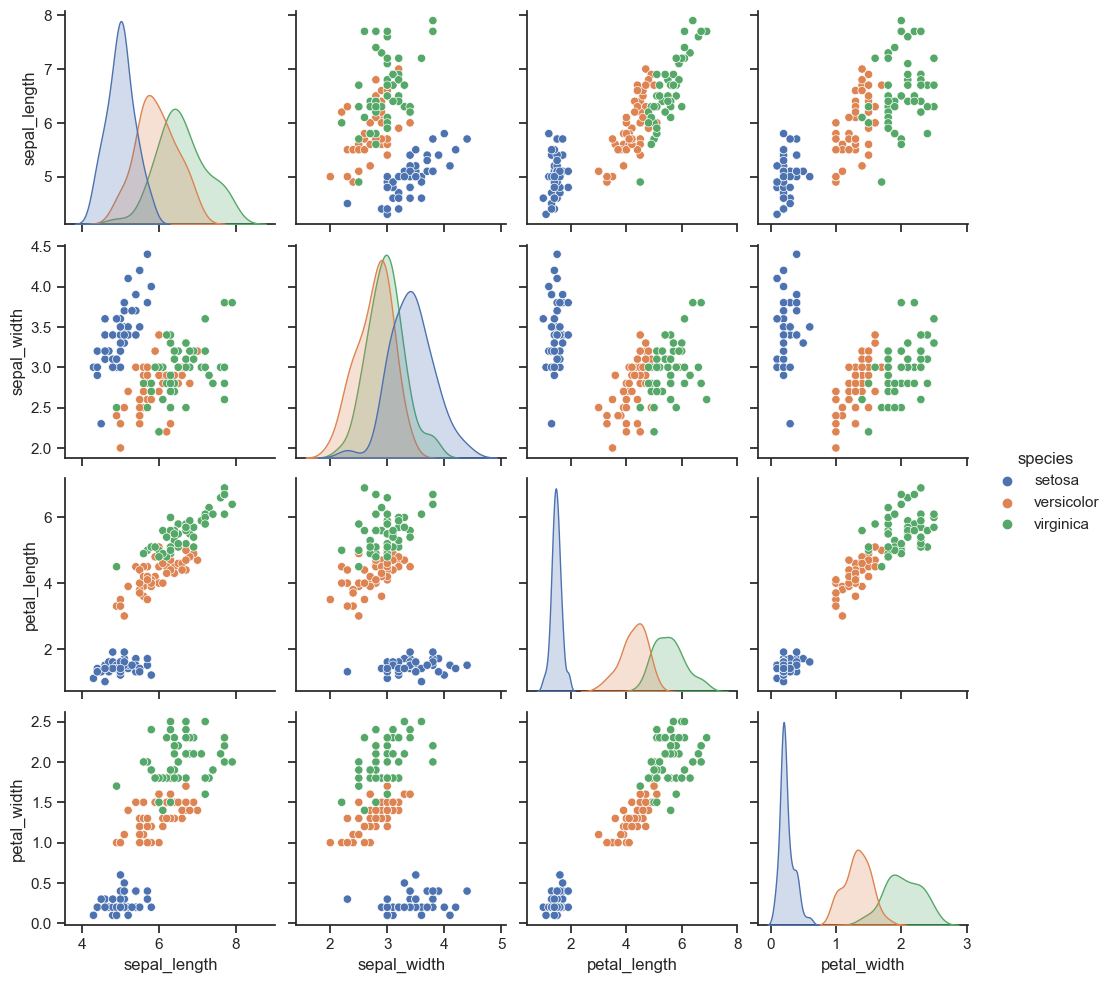

In [6]:
sns.set(style="ticks", color_codes=True)
iris = sns.load_dataset("iris")
sns.pairplot(iris, hue="species")
# Creating a scatterplot using seaborn to look at the distributions and correlations of all the features in the iris dataset
# These plots will help us decide which two features to use for a nearest neighbours analysis (two features that are not correlated and have good separation between iris species)

In [7]:
# Creating a function plot_knn() in order to plot a nearest neighbours analysis later on
def plot_knn(model, X, y, resolution=100, ax=None):
    import matplotlib.pyplot as plt
    import numpy as np
    import pandas as pd

    if X.shape[1] != 2:
        raise ValueError(f"X must have exactly two features to plot, you passed X.shape={X.shape}")
    if not isinstance(X, pd.DataFrame):
        X = pd.DataFrame(X)
    x1 = X.iloc[:,0]
    x2 = X.iloc[:,1]
    x1_range = np.linspace(x1.min()*1.1 - x1.max()*0.1, x1.max()*1.1 - x1.min()*0.1, resolution)
    x2_range = np.linspace(x2.min()*1.1 - x2.max()*0.1, x2.max()*1.1 - x2.min()*0.1, resolution)
    grid_x1_values, grid_x2_values = np.meshgrid(x1_range, x2_range)
    x_prime = np.column_stack((grid_x1_values.ravel(), grid_x2_values.ravel()))
    x_prime = pd.DataFrame(x_prime, columns=X.columns)
    y_hat = model.predict(x_prime).reshape(grid_x1_values.shape)

    if ax is None:
        fig, ax = plt.subplots()
    ax.pcolormesh(grid_x1_values, grid_x2_values, y_hat, cmap="Pastel2", alpha=1.0, shading="auto")
    X.plot.scatter(0, 1, c=y, colormap="Dark2", colorbar=True, alpha=0.8, ax=ax)

<AxesSubplot:xlabel='sepal_length', ylabel='sepal_width'>

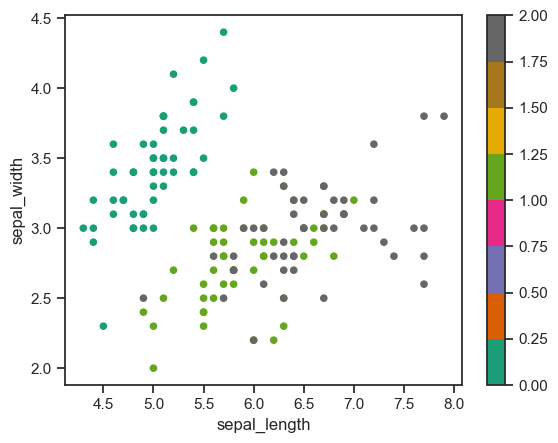

In [8]:
# From the scatter matrix above it appears that sepal length and sepal width would be good candidates for a nearest neighbours analysis as there is good separation of these features between species
# Set the y axis as target (in this case targets are the 3 species of iris labelled 0, 1 and 2)
# The features in X can be changed to make predictions for any other variable in the iris dataset
y = target
X = iris[["sepal_width", "sepal_length"]]

# Creating a scatter plot of the two features with sepal_length on the x-axis and sepal_width on the y-axis. colorbar = True adds a bar to indicate the targets in the dataset
# Targets (iris species): 0 = setosa, 1 = versicolor, 2 = virginica
X.plot.scatter("sepal_length", "sepal_width", c = y, colormap = "Dark2", colorbar = True)

In [9]:
# To perform nearest neighbours analysis we need to import the train_test_split and GridSearchCV functions from the scikitlearn.model_selection library and the KNeighboursClassifier function from the scikitlearn.neighbours library
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# Split the iris dataset into a training set and a testing set
train_X, test_X, train_y, test_y = train_test_split(X, y, random_state = 42)

In [10]:
# Defining the hyperparameters - Determine the number of neighbours (k) that best fit the nearest neighbours model
# Creating a dictionary called parameters with n_neighbours ranging from 1 to 50
parameters = {"n_neighbors" : range(1, 51)}

# Evalute the fit of each n_neighbours by creating a variable using the GridSearchCV function and passing the arguements KNeighborsClassifier() and the parameters variable
model = GridSearchCV(KNeighborsClassifier(), parameters)
model.fit(train_X, train_y) # Fitting the training data to the model created above

C:\Users\cajt201\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\cajt201\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `kee

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 51)})

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='param_n_neighbors', ylabel='mean_test_score'>

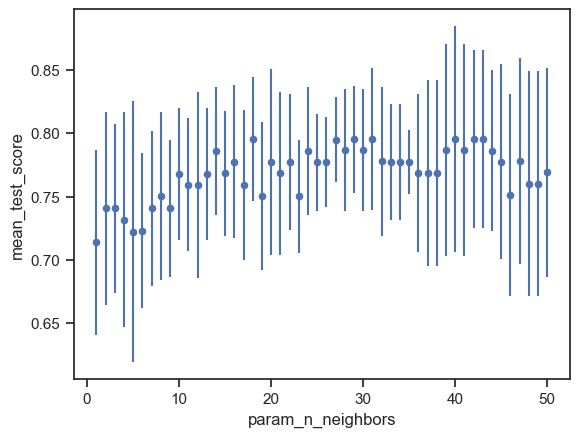

In [11]:
# Visualise the score of each n_neighbours to select a k value that will give the best model score
cv_results = pd.DataFrame(model.cv_results_)
cv_results.plot.scatter("param_n_neighbors", "mean_test_score", yerr="std_test_score")

In [12]:
# Find the highest mean test score rounded to 2 decimal places
round(cv_results["mean_test_score"].max(), 2)

0.8

In [13]:
# Find the hyperparameter that contains the highest mean test score 
cv_results["mean_test_score"].idxmax()

17

In [14]:
# Find the exact hyperparameter that had a mean test score of 0.8 by using the result of cv_results["mean_test_score"].idxmax()
cv_results.loc[17]

mean_fit_time                   0.000473
std_fit_time                    0.000874
mean_score_time                  0.00162
std_score_time                   0.00324
param_n_neighbors                     18
params               {'n_neighbors': 18}
split0_test_score                0.73913
split1_test_score                0.73913
split2_test_score               0.863636
split3_test_score               0.818182
split4_test_score               0.818182
mean_test_score                 0.795652
std_test_score                  0.049044
rank_test_score                        1
Name: 17, dtype: object

C:\Users\cajt201\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


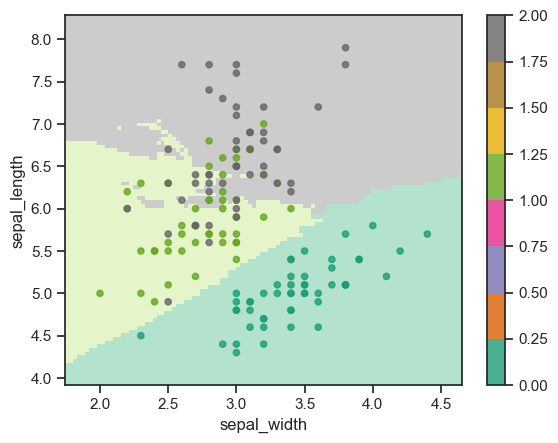

In [15]:
# Create a model by classifying the number of neighbours to use to predict the boundaries of the model.
# The number of neighbours can be altered by changing the number proceeding KNeighborsClassifier(n_neighbors =  )
model_k18 = KNeighborsClassifier(n_neighbors = 18)
model_k18.fit(train_X, train_y)

# Plot the nearest neighbours model that was created along with the X and y variables
plot_knn(model_k18, X, y)

In [16]:
# Generate a score for the fit of the test data for the K Nearest Neighbours model 
model_k18.score(test_X, test_y)

C:\Users\cajt201\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.7894736842105263

In [17]:
# Carry out PCA analysis by first resplitting the data
train_X, test_X, train_y, test_y = train_test_split(X, y, random_state=42)

In [28]:
# Create a pipeline that will will perform the PCA analysis on all features in the DataFrame and will apply a K value
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

pca_knn = make_pipeline(
    PCA(),  
    KNeighborsClassifier()
)
pca_knn

Pipeline(steps=[('pca', PCA(n_components=2)),
                ('kneighborsclassifier', KNeighborsClassifier())])

In [29]:
# Fit the PCA and Knn model to the train data then score the PCA/Knn model with the test data
pca_knn.fit(train_X, train_y)
pca_knn.score(test_X, test_y)

C:\Users\cajt201\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.8157894736842105

C:\Users\cajt201\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


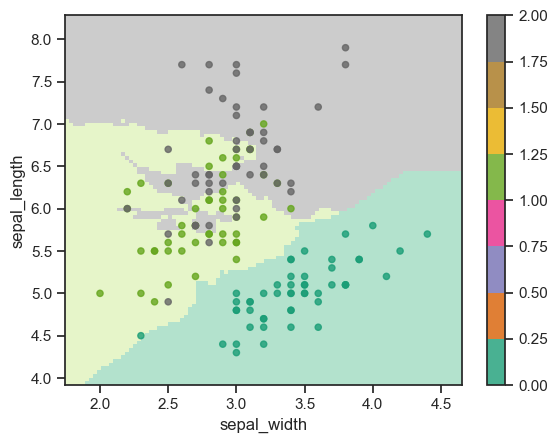

In [20]:
# Plot X and y variables with the PCA and Knn model
plot_knn(pca_knn, X, y)

In [24]:
# Making predictions from the PCA K nearest neighbours model
# The following code will allow you to input new data within the range of x and y. From those inputs the model can predict which species those data points would belong to.
width =  float(input("Sepal Width (cm): "))
length = float(input("Sepal Length (cm): "))

irisPR = pd.DataFrame(data = {'sepal_width': [width], 'sepal_length': [length]})

species = pca_knn.predict(irisPR)
print(f"This iris is probably species {species}")

Sepal Width (cm):  3
Sepal Length (cm):  7


This iris is probably species [2]


C:\Users\cajt201\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
